# Imports and Files

In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot
import pylab
import pickle
import patsy
%matplotlib inline
%config InlineBackend.figure_format='svg'
import scipy
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Lasso
import datetime as dt
from sklearn import datasets, linear_model

/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
combine_table = pd.read_pickle('new_citizens.pkl')
df = pd.read_pickle('first_table.pkl')
combine_table_log = pd.read_pickle('new_citizens_log.pkl')

In [3]:
combine_table.head()

Year  US_GDP  World_GDP  US_Population  Global_Population  Foreign_Policy  \
31  1960    3.08      11.20      179322000       3.033213e+09               0   
32  1961    3.28      11.68      182976000       3.090305e+09               1   
33  1962    3.42      12.33      185739000       3.149244e+09               1   
34  1963    3.60      12.97      188434000       3.210271e+09               1   
35  1964    3.78      13.84      191085000       3.273671e+09               1   

    new_citizens  
31      265398.0  
32      271344.0  
33      283763.0  
34      306260.0  
35      292248.0

In [4]:
df.head()

new_citizens  year
0       1183505  2016
1       1051031  2015
2       1016518  2014
3        990553  2013
4       1031631  2012

In [5]:
combine_table_log.head()

Year  US_GDP  World_GDP  US_Population  Global_Population  Foreign_Policy  \
31  1960    3.08      11.20      179322000       3.033213e+09               0   
32  1961    3.28      11.68      182976000       3.090305e+09               1   
33  1962    3.42      12.33      185739000       3.149244e+09               1   
34  1963    3.60      12.97      188434000       3.210271e+09               1   
35  1964    3.78      13.84      191085000       3.273671e+09               1   

    new_citizens_log  
31         12.488986  
32         12.511143  
33         12.555895  
34         12.632190  
35         12.585358

# Use table that has the new_citizens logged

## Do Train/Test Split for the new_citizens logged

In [6]:
len(combine_table_log)

56

In [7]:
X = combine_table_log.drop(['new_citizens_log','Year'],axis=1)
y = combine_table_log['new_citizens_log']

In [8]:
X.head()

US_GDP  World_GDP  US_Population  Global_Population  Foreign_Policy
31    3.08      11.20      179322000       3.033213e+09               0
32    3.28      11.68      182976000       3.090305e+09               1
33    3.42      12.33      185739000       3.149244e+09               1
34    3.60      12.97      188434000       3.210271e+09               1
35    3.78      13.84      191085000       3.273671e+09               1

In [9]:
y.head()

31    12.488986
32    12.511143
33    12.555895
34    12.632190
35    12.585358
Name: new_citizens_log, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50, 5) (50,)
(6, 5) (6,)


In [11]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [12]:
predictions

array([13.63939218, 12.56368346, 13.70205709, 12.64935133, 13.64188113,
       13.29826237])

Text(0,0.5,'Predictions')

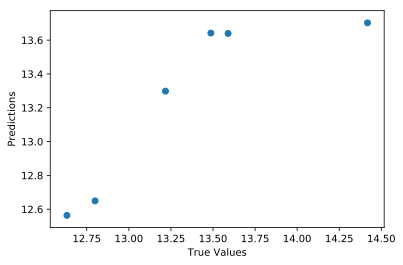

In [13]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [14]:
model.score(X_test, y_test)

0.7210365000335055

## Use K-Folds Cross Validation now

In [15]:
from sklearn.cross_validation import cross_val_score
# 10-fold cross-validation
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=10, scoring='mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

[0.03746563 0.03865256 0.02010162 0.01834378 0.08250962 0.10489484
 0.05253596 0.04926378 0.02019148 0.15318171]


/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

# Test on the Trained Model

In [16]:
len(combine_table)

56

In [17]:
combine_table.head()

Year  US_GDP  World_GDP  US_Population  Global_Population  Foreign_Policy  \
31  1960    3.08      11.20      179322000       3.033213e+09               0   
32  1961    3.28      11.68      182976000       3.090305e+09               1   
33  1962    3.42      12.33      185739000       3.149244e+09               1   
34  1963    3.60      12.97      188434000       3.210271e+09               1   
35  1964    3.78      13.84      191085000       3.273671e+09               1   

    new_citizens  
31      265398.0  
32      271344.0  
33      283763.0  
34      306260.0  
35      292248.0

In [18]:
X = combine_table.drop(['new_citizens','Year'],axis=1)
y = combine_table['new_citizens']

In [19]:
X.head()

US_GDP  World_GDP  US_Population  Global_Population  Foreign_Policy
31    3.08      11.20      179322000       3.033213e+09               0
32    3.28      11.68      182976000       3.090305e+09               1
33    3.42      12.33      185739000       3.149244e+09               1
34    3.60      12.97      188434000       3.210271e+09               1
35    3.78      13.84      191085000       3.273671e+09               1

In [20]:
y.head()

31    265398.0
32    271344.0
33    283763.0
34    306260.0
35    292248.0
Name: new_citizens, dtype: float64

In [21]:
# cross validation test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50, 5) (50,)
(6, 5) (6,)


In [22]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions2 = lm.predict(X_test)

In [23]:
predictions2

array([1202024.98625338,  980959.3134163 ,  499497.55223975,
        278616.62220971,  441282.17592491,  253828.0215255 ])

Text(0,0.5,'Predictions')

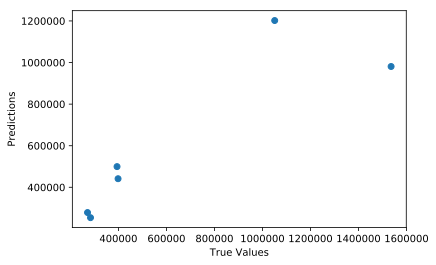

In [24]:
plt.scatter(y_test, predictions2)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [25]:
model.score(X_test, y_test)

0.7450473667413291

In [26]:
y_test.head()

86    1051031.0
61    1535872.0
50     394244.0
32     271344.0
44     398515.0
Name: new_citizens, dtype: float64

In [27]:
preds = model.predict(X_test)
rmse = np.sqrt(MSE(y_test, predictions))
rmse

809511.9060007036

In [37]:
r2_training = model.score(X_train, y_train)

### R^2 number

In [34]:
r2_training

0.7278759374853012

In [ ]:
r2adj_training

### Lasso coefficients, score and graphing the coefficients

/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


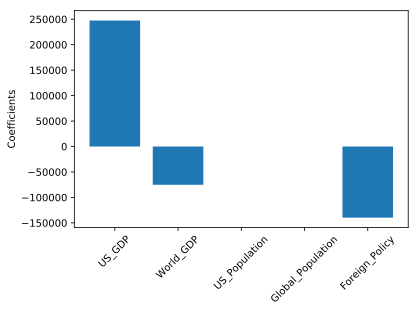

0.9699544558518858

In [28]:
# graphs coefficients of lassos

lasso = Lasso(alpha=1e-2)
lasso_coef = lasso.fit(X_test, y_test).coef_
_ = plt.bar(range(len(X_test.columns)), lasso_coef)
_ = plt.xticks(range(len(X_test.columns)), X_test.columns, rotation=45)
_ = plt.ylabel('Coefficients')
plt.show()
lasso.score(X_test,y_test)

## Not doing a poly transform since all variables are linear, except the new_citizens variable which is on a logarithmic scale